In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir = '/mnt/share/costeffectiveness/results/vivarium_ciff_sam/v7.1.0_full_model_vicious_cyle_diarrhea_remission/ciff_sam/2022_03_08_00_15_24/count_data/'

In [3]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [4]:
scenarios = ['sam_treatment','mam_treatment','sqlns',
                'lbwsg_interventions','zinc_supplementation']
scenario_names = ['SAM treatment',
                 'MAM treatment',
                 'SQ-LNS',
                 'LBWSG interventions',
                 'Zinc supplementation']
scenario_colors = [#'tab:blue',
                  'tab:orange',
                  'tab:green',
                  'tab:red',
                  'tab:purple',
                  'tab:brown']

ages = ['6-11_months','12_to_23_months','2_to_4']

In [5]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# wasting treatment

In [6]:
# start with wasting treatment

wasting_transition_count = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transition_count.head()

,sex,year,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [7]:
mam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                            'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count']))
              &(wasting_transition_count.mam_treatment=='covered')]
          .groupby(['input_draw','scenario']).sum()[['value']].reset_index())
mam_tx['intervention'] = 'mam_treatment'
mam_tx

,input_draw,scenario,value,intervention
0,29,baseline,19049.0,mam_treatment
1,29,lbwsg_interventions,46384.0,mam_treatment
2,29,mam_treatment,52819.0,mam_treatment
3,29,sam_treatment,18734.0,mam_treatment
4,29,sqlns,46382.0,mam_treatment
...,...,...,...,...
61,946,lbwsg_interventions,46714.0,mam_treatment
62,946,mam_treatment,51850.0,mam_treatment
63,946,sam_treatment,15909.0,mam_treatment
64,946,sqlns,46713.0,mam_treatment


In [8]:
sam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count')
              &(wasting_transition_count.sam_treatment=='covered')]
          .groupby(['input_draw','scenario']).sum()[['value']].reset_index())
sam_tx['intervention'] = 'sam_treatment'
sam_tx

,input_draw,scenario,value,intervention
0,29,baseline,13454.0,sam_treatment
1,29,lbwsg_interventions,13920.0,sam_treatment
2,29,mam_treatment,14997.0,sam_treatment
3,29,sam_treatment,15950.0,sam_treatment
4,29,sqlns,13934.0,sam_treatment
...,...,...,...,...
61,946,lbwsg_interventions,14289.0,sam_treatment
62,946,mam_treatment,15250.0,sam_treatment
63,946,sam_treatment,16322.0,sam_treatment
64,946,sqlns,14317.0,sam_treatment


# sqlns

In [9]:
pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [10]:
pt.age.unique()

array(['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months',
       '12_to_23_months', '2_to_4'], dtype=object)

In [11]:
sqlns = (pt.loc[(pt.age.isin(['6-11_months',
       '12_to_23_months', '2_to_4']))
               &(pt.sq_lns=='covered')]
         .groupby(['input_draw','scenario']).sum())[['value']].reset_index()
sqlns['intervention'] = 'sqlns'
sqlns

,input_draw,scenario,value,intervention
0,29,baseline,0.000000,sqlns
1,29,lbwsg_interventions,211608.695414,sqlns
2,29,mam_treatment,0.000000,sqlns
3,29,sam_treatment,0.000000,sqlns
4,29,sqlns,211558.444901,sqlns
...,...,...,...,...
61,946,lbwsg_interventions,211343.362081,sqlns
62,946,mam_treatment,0.000000,sqlns
63,946,sam_treatment,0.000000,sqlns
64,946,sqlns,211278.080767,sqlns


# lbwsg

In [12]:
births = pd.read_csv(output_dir + 'births.csv')
births.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
0,0,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,bep,cat2
1,1,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,bep,cat2
2,2,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,mmn,cat2
3,3,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,mmn,cat2
4,4,female,2022,birth_weight_sum,29,baseline,4.489095e+06,covered,ifa,cat2


In [13]:
births.measure.unique()

array(['birth_weight_sum', 'low_weight_births', 'total_births'],
      dtype=object)

In [14]:
supplementation = (births.loc[(births.measure=='total_births')]
                   .groupby(['input_draw','scenario','maternal_supplementation']).sum()
                   [['value']]
                   .reset_index()
                   .rename(columns={'maternal_supplementation':'intervention'}))
supplementation = supplementation.loc[supplementation.intervention!='uncovered']
supplementation

,input_draw,scenario,intervention,value
0,29,baseline,bep,0.0
1,29,baseline,ifa,64725.0
2,29,baseline,mmn,0.0
4,29,lbwsg_interventions,bep,11061.0
5,29,lbwsg_interventions,ifa,25814.0
...,...,...,...,...
257,946,sqlns,ifa,63189.0
258,946,sqlns,mmn,0.0
260,946,zinc_supplementation,bep,11307.0
261,946,zinc_supplementation,ifa,24853.0


In [15]:
itns = (births.loc[(births.measure=='total_births')
                              &(births.insecticide_treated_nets=='covered')]
                   .groupby(['input_draw','scenario']).sum()
                   [['value']]
                   .reset_index())
itns['intervention'] = 'itns'
itns

,input_draw,scenario,value,intervention
0,29,baseline,30381.0,itns
1,29,lbwsg_interventions,44389.0,itns
2,29,mam_treatment,30381.0,itns
3,29,sam_treatment,30381.0,itns
4,29,sqlns,30381.0,itns
...,...,...,...,...
61,946,lbwsg_interventions,43619.0,itns
62,946,mam_treatment,27847.0,itns
63,946,sam_treatment,27847.0,itns
64,946,sqlns,27847.0,itns


# zinc

In [16]:
# to do when we get the outputs

In [17]:
ther_zinc = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')
ther_zinc = ther_zinc.loc[ther_zinc.age.isin(ages)]
ther_zinc = ther_zinc.loc[(ther_zinc.therapeutic_zinc=='covered')
                         &(ther_zinc.measure=='susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count')]
ther_zinc = ther_zinc.groupby(['input_draw','scenario']).sum()[['value']].reset_index()
ther_zinc['intervention'] = 'therapeutic_zinc'
ther_zinc

,input_draw,scenario,value,intervention
0,29,baseline,163229.0,therapeutic_zinc
1,29,lbwsg_interventions,160624.0,therapeutic_zinc
2,29,mam_treatment,163239.0,therapeutic_zinc
3,29,sam_treatment,163229.0,therapeutic_zinc
4,29,sqlns,160679.0,therapeutic_zinc
...,...,...,...,...
61,946,lbwsg_interventions,291048.0,therapeutic_zinc
62,946,mam_treatment,296235.0,therapeutic_zinc
63,946,sam_treatment,296234.0,therapeutic_zinc
64,946,sqlns,291136.0,therapeutic_zinc


In [18]:
prev_zinc = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
prev_zinc = prev_zinc.loc[prev_zinc.age.isin(ages)]
prev_zinc = prev_zinc.loc[(prev_zinc.preventative_zinc=='covered')]
prev_zinc = prev_zinc.groupby(['input_draw','scenario']).sum()[['value']].reset_index()
prev_zinc['intervention'] = 'preventative_zinc'
prev_zinc

,input_draw,scenario,value,intervention
0,29,baseline,0.000000,preventative_zinc
1,29,lbwsg_interventions,0.000000,preventative_zinc
2,29,mam_treatment,0.000000,preventative_zinc
3,29,sam_treatment,0.000000,preventative_zinc
4,29,sqlns,0.000000,preventative_zinc
...,...,...,...,...
61,946,lbwsg_interventions,0.000000,preventative_zinc
62,946,mam_treatment,0.000000,preventative_zinc
63,946,sam_treatment,0.000000,preventative_zinc
64,946,sqlns,0.000000,preventative_zinc


# all interventions


This dataframe gives us the total ANNUAL number of services provided for each intervention in each simulated scenario, by draw. This should be compared with simulation outcomes in count space to calculate ICERs (or converted to rate space to calculate costs per population size). 

Note:

- SQ-LNS and prevenative zinc are measures of person-time rather than counts... it is equivalent to the count of yearly provisions
- For maternal supplementation and insecticide treated nets, we consider coverage only among live births. However, this will be an underestimate of total population coverage of these interventions given that some mothers covered by the interventions will result in stillbirths. We should consider either: a) noting this in our limitations, or b) incorporating this into our cost model using the stillbirth to live birth ratio covariate
    - Also, we do not consider the delay in coverage to account for gestation

In [19]:
data = pd.concat([sam_tx,
                 mam_tx,
                 sqlns,
                 supplementation,
                 itns,
                 prev_zinc,
                 ther_zinc])
data

,input_draw,scenario,value,intervention
0,29,baseline,13454.0,sam_treatment
1,29,lbwsg_interventions,13920.0,sam_treatment
2,29,mam_treatment,14997.0,sam_treatment
3,29,sam_treatment,15950.0,sam_treatment
4,29,sqlns,13934.0,sam_treatment
...,...,...,...,...
61,946,lbwsg_interventions,291048.0,therapeutic_zinc
62,946,mam_treatment,296235.0,therapeutic_zinc
63,946,sam_treatment,296234.0,therapeutic_zinc
64,946,sqlns,291136.0,therapeutic_zinc


# import costs

In [20]:
costs = pd.read_csv('ciff_costs.csv').rename(columns={'intervention_name':'intervention'})
costs.head()

,intervention,cost_per_service
0,sam_treatment,49.68
1,mam_treatment,12.55
2,sqlns,23.25
3,ifa,0.91
4,mms,2.98


In [21]:
sim_costs = data.merge(costs, on=['intervention'])
sim_costs['total_cost'] = sim_costs['value'] * sim_costs.cost_per_service
(sim_costs.groupby(['input_draw','scenario','intervention']).sum()).groupby(['intervention','scenario']).mean()/1_000_000

value  cost_per_service  total_cost
intervention      scenario                                                    
bep               baseline              0.000000      3.224000e-05    0.000000
                  lbwsg_interventions   0.011019      3.224000e-05    0.355255
                  mam_treatment         0.000000      3.224000e-05    0.000000
                  sam_treatment         0.000000      3.224000e-05    0.000000
                  sqlns                 0.000000      3.224000e-05    0.000000
                  zinc_supplementation  0.011019      3.224000e-05    0.355255
ifa               baseline              0.064848      9.100000e-07    0.059012
                  lbwsg_interventions   0.025862      9.100000e-07    0.023534
                  mam_treatment         0.064848      9.100000e-07    0.059012
                  sam_treatment         0.064848      9.100000e-07    0.059012
                  sqlns                 0.064848      9.100000e-07    0.059012
                  zinc_supplementation  0.025862      9.100000e-07    0.023534
itns              baseline              0.028915      4.450000e-06    0.128674
                  lbwsg_interventions   0.043927      4.450000e-06    0.195476
                  mam_treatment         0.028915      4.450000e-06    0.128674
                  sam_treatment         0.028915      4.450000e-06    0.128674
                  sqlns                 0.028915      4.450000e-06    0.128674
                  zinc_supplementation  0.043927      4.450000e-06    0.195476
mam_treatment     baseline              0.017169      1.255000e-05    0.215476
                  lbwsg_interventions   0.046276      1.255000e-05    0.580760
                  mam_treatment         0.051335      1.255000e-05    0.644260
                  sam_treatment         0.016901      1.255000e-05    0.212110
                  sqlns                 0.046277      1.255000e-05    0.580772
                  zinc_supplementation  0.043811      1.255000e-05    0.549823
preventative_zinc baseline              0.000000      2.610000e-06    0.000000
                  lbwsg_interventions   0.000000      2.610000e-06    0.000000
                  mam_treatment         0.000000      2.610000e-06    0.000000
                  sam_treatment         0.000000      2.610000e-06    0.000000
                  sqlns                 0.000000      2.610000e-06    0.000000
                  zinc_supplementation  0.211030      2.610000e-06    0.550789
sam_treatment     baseline              0.011994      4.968000e-05    0.595862
                  lbwsg_interventions   0.013064      4.968000e-05    0.649015
                  mam_treatment         0.013927      4.968000e-05    0.691911
                  sam_treatment         0.014858      4.968000e-05    0.738141
                  sqlns                 0.013080      4.968000e-05    0.649823
                  zinc_supplementation  0.012646      4.968000e-05    0.628249
sqlns             baseline              0.000000      2.325000e-05    0.000000
                  lbwsg_interventions   0.211039      2.325000e-05    4.906647
                  mam_treatment         0.000000      2.325000e-05    0.000000
                  sam_treatment         0.000000      2.325000e-05    0.000000
                  sqlns                 0.210979      2.325000e-05    4.905263
                  zinc_supplementation  0.211099      2.325000e-05    4.908045
therapeutic_zinc  baseline              0.383474      1.900000e-07    0.072860
                  lbwsg_interventions   0.379066      1.900000e-07    0.072023
                  mam_treatment         0.383496      1.900000e-07    0.072864
                  sam_treatment         0.383484      1.900000e-07    0.072862
                  sqlns                 0.379165      1.900000e-07    0.072041
                  zinc_supplementation  0.502520      1.900000e-07    0.095479

In [22]:
sim_costs = data.merge(costs, on=['intervention'])
sim_costs['total_cost'] = sim_costs['value'] * sim_costs.cost_per_service
sim_costs = sim_costs.groupby(['input_draw','scenario']).sum()[['total_cost']].rename(columns={'total_cost':'value'})
sim_costs

value
input_draw scenario                          
29         baseline              1.132568e+06
           lbwsg_interventions   6.801714e+06
           mam_treatment         1.633040e+06
           sam_treatment         1.252616e+06
           sqlns                 6.417693e+06
...                                       ...
946        lbwsg_interventions   6.846429e+06
           mam_treatment         1.646043e+06
           sam_treatment         1.248241e+06
           sqlns                 6.446469e+06
           zinc_supplementation  7.373847e+06

[66 rows x 1 columns]

In [23]:
pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
pt = pt.groupby(['input_draw','scenario']).sum()[['value']]
pt.head()

value
input_draw scenario                          
29         baseline             518331.567420
           lbwsg_interventions  518485.071869
           mam_treatment        518364.346338
           sam_treatment        518342.000000
           sqlns                518395.570157

In [24]:
sim_cost_rate = sim_costs / pt * 100_000
sim_cost_rate 

value
input_draw scenario                          
29         baseline              2.185027e+05
           lbwsg_interventions   1.311844e+06
           mam_treatment         3.150371e+05
           sam_treatment         2.416583e+05
           sqlns                 1.237992e+06
...                                       ...
946        lbwsg_interventions   1.318996e+06
           mam_treatment         3.172030e+05
           sam_treatment         2.405460e+05
           sqlns                 1.242244e+06
           zinc_supplementation  1.420361e+06

[66 rows x 1 columns]

In [25]:
sim_cost_rate.groupby('scenario').describe(percentiles=[0.025,0.975])/1_000_000
# costs in millions for each scenario

value                                          \
                         count      mean       std       min      2.5%   
scenario                                                                 
baseline              0.000011  0.207073  0.024310  0.156547  0.163005   
lbwsg_interventions   0.000011  1.309744  0.017971  1.281841  1.283702   
mam_treatment         0.000011  0.308417  0.018736  0.278807  0.281101   
sam_treatment         0.000011  0.233880  0.019437  0.201426  0.204646   
sqlns                 0.000011  1.235243  0.018163  1.207798  1.209489   
zinc_supplementation  0.000011  1.410703  0.017448  1.384144  1.385893   

                                                    
                           50%     97.5%       max  
scenario                                            
baseline              0.211116  0.237144  0.238583  
lbwsg_interventions   1.315816  1.337458  1.341795  
mam_treatment         0.315037  0.335368  0.339548  
sam_treatment         0.240546  0.263273  0.266868  
sqlns                 1.238704  1.264536  1.268988  
zinc_supplementation  1.416318  1.434203  1.437407

In [26]:
incremental_cost = (sim_cost_rate - 
                     (sim_cost_rate.reset_index().loc[sim_cost_rate.reset_index().scenario=='baseline'])
                     .set_index('input_draw')[['value']])
incremental_cost # per 100,000 py

value
input_draw scenario                          
29         baseline              0.000000e+00
           lbwsg_interventions   1.093341e+06
           mam_treatment         9.653442e+04
           sam_treatment         2.315561e+04
           sqlns                 1.019489e+06
...                                       ...
946        lbwsg_interventions   1.112012e+06
           mam_treatment         1.102192e+05
           sam_treatment         3.356214e+04
           sqlns                 1.035260e+06
           zinc_supplementation  1.213377e+06

[66 rows x 1 columns]

In [27]:
cols = ['input_draw','scenario','age']

ylds = pd.read_csv(output_dir + 'ylds.csv').groupby(cols).sum()[['value']]
ylls = pd.read_csv(output_dir + 'ylls.csv').groupby(cols).sum()[['value']]
dalys = (ylds + ylls).reset_index()

dalys_lbwsg = dalys.loc[(dalys.age.isin(['early_neonatal','late_neonatal','1-5_months']))
                         &(dalys.scenario=='lbwsg_interventions')]
dalys_lbwsg['scenario'] = 'zinc_supplementation'
dalys_zinc = dalys.loc[(dalys.scenario=='zinc_supplementation')&(dalys.age.isin(['6-11_months',
                                                                            '12_to_23_months',
                                                                            '2_to_4']))]
dalys_zinc = pd.concat([dalys_zinc,dalys_lbwsg])
dalys = pd.concat([dalys.loc[dalys.scenario!='zinc_supplementation'],
                 dalys_zinc]).groupby(['input_draw','scenario']).sum()

dalys = dalys / pt * 100_000
dalys_baseline = dalys.reset_index().loc[dalys.reset_index().scenario=='baseline'].set_index(['input_draw'])[['value']]
dalys_averted = dalys_baseline - dalys
dalys_averted.head()

/tmp/ipykernel_605786/2956799849.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dalys_lbwsg['scenario'] = 'zinc_supplementation'


value
input_draw scenario                        
29         baseline                0.000000
           lbwsg_interventions  2280.569009
           mam_treatment         515.753572
           sam_treatment         202.420887
           sqlns                1150.662612

In [28]:
cols = ['input_draw','scenario']

wt = pd.read_csv(output_dir + 'wasting_transition_count.csv')#.groupby(cols).sum()[['value']]
sam_cases = (wt.loc[wt.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count']
             .groupby(cols).sum()[['value']])
sam_cases = sam_cases / pt * 100_000
sam_cases_baseline = sam_cases.reset_index().loc[sam_cases.reset_index().scenario=='baseline'].set_index('input_draw').drop(columns='scenario')
sam_cases_averted = (sam_cases_baseline - sam_cases)
sam_cases_pct_reduction = (sam_cases_baseline - sam_cases)/sam_cases_baseline*100
sam_cases_averted

value
input_draw scenario                        
29         baseline                0.000000
           lbwsg_interventions   653.035777
           mam_treatment         338.311357
           sam_treatment          63.960943
           sqlns                 649.367228
...                                     ...
946        lbwsg_interventions   693.645847
           mam_treatment         412.116313
           sam_treatment          96.415442
           sqlns                 684.151552
           zinc_supplementation  829.914803

[66 rows x 1 columns]

In [29]:
cols = ['input_draw','scenario']

wpt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')#.groupby(cols).sum()[['value']]
wpt = wpt.loc[wpt.age.isin(['6-11_months','12_to_23_months','2_to_4'])]
sam_prev = ((wpt.loc[wpt.cause=='severe_acute_malnutrition']
             .groupby(cols).sum()[['value']])
            / wpt.groupby(cols).sum()[['value']]) * 100
sam_prev_baseline = sam_prev.reset_index().loc[sam_prev.reset_index().scenario=='baseline'].set_index('input_draw').drop(columns='scenario')
sam_prev_averted = (sam_prev_baseline - sam_prev)
sam_prev_pct_reduction = (sam_prev_baseline - sam_prev)/sam_prev_baseline*100
sam_prev_pct_reduction

value
input_draw scenario                       
29         baseline               0.000000
           lbwsg_interventions   15.783293
           mam_treatment         11.445940
           sam_treatment          7.693507
           sqlns                 15.673332
...                                    ...
946        lbwsg_interventions   15.477675
           mam_treatment         11.692747
           sam_treatment          7.792941
           sqlns                 15.206409
           zinc_supplementation  17.065367

[66 rows x 1 columns]

In [30]:
def calculate_sam_cases_averted(sam_cases_averted_scenario, relative_scenario):
    sam_cases_rel = (sam_cases.reset_index().loc[sam_cases.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw'])[['value']])
    sam_cases_averted_rel = (sam_cases_rel - sam_cases).reset_index()
    sam_cases_averted_rel = sam_cases_averted_rel.loc[sam_cases_averted_rel.scenario==sam_cases_averted_scenario]
    return sam_cases_averted_rel

def calculate_cascading_sam_cases_averted():
    data = calculate_sam_cases_averted('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_sam_cases_averted(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [31]:
def calculate_incremental_cost(incremental_cost_scenario, relative_scenario):
    sim_cost_rel = (sim_cost_rate.reset_index().loc[sim_cost_rate.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw'])[['value']])
    incremental_cost = (sim_cost_rate - sim_cost_rel).reset_index()
    incremental_cost = incremental_cost.loc[incremental_cost.scenario==incremental_cost_scenario]
    return incremental_cost

def calculate_cascading_incremental_costs():
    data = calculate_incremental_cost('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_incremental_cost(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [32]:
def calculate_dalys_averted(dalys_averted_scenario, relative_scenario):
    dalys_rel = (dalys.reset_index().loc[dalys.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw'])[['value']])
    dalys_averted_rel = (dalys_rel - dalys).reset_index()
    dalys_averted_rel = dalys_averted_rel.loc[dalys_averted_rel.scenario==dalys_averted_scenario]
    return dalys_averted_rel

def calculate_cascading_dalys_averted():
    data = calculate_dalys_averted('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_dalys_averted(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [33]:
cascading_incremental_costs = calculate_cascading_incremental_costs()
cascading_incremental_costs.head()

,input_draw,scenario,value,relative_scenario
3,29,sam_treatment,23155.606633,baseline
9,232,sam_treatment,26082.717249,baseline
15,357,sam_treatment,19103.622049,baseline
21,394,sam_treatment,19659.480858,baseline
27,524,sam_treatment,21978.185619,baseline


In [34]:
cascading_incremental_costs.groupby('scenario').describe(percentiles=[0.025,0.975])

input_draw                                              \
                          count        mean         std   min   2.5%    50%   
scenario                                                                      
lbwsg_interventions        11.0  533.818182  265.037287  29.0  79.75  602.0   
mam_treatment              11.0  533.818182  265.037287  29.0  79.75  602.0   
sam_treatment              11.0  533.818182  265.037287  29.0  79.75  602.0   
sqlns                      11.0  533.818182  265.037287  29.0  79.75  602.0   
zinc_supplementation       11.0  533.818182  265.037287  29.0  79.75  602.0   

                                    value                              \
                       97.5%    max count           mean          std   
scenario                                                                
lbwsg_interventions   916.75  946.0  11.0   74501.213903  1503.488527   
mam_treatment         916.75  946.0  11.0   74536.364301  2264.280858   
sam_treatment         916.75  946.0  11.0   26807.417522  7658.116637   
sqlns                 916.75  946.0  11.0  926826.262903  3882.495977   
zinc_supplementation  916.75  946.0  11.0  100959.066925  3235.668956   

                                                                   \
                                min           2.5%            50%   
scenario                                                            
lbwsg_interventions    72603.871869   72654.524669   74043.080428   
mam_treatment          70340.249596   70784.813363   74580.655074   
sam_treatment          19103.622049   19242.586751   25479.453421   
sqlns                 921551.454923  921902.199061  926971.818567   
zinc_supplementation   95612.325496   96226.742658  100501.650889   

                                                    
                              97.5%            max  
scenario                                            
lbwsg_interventions    77022.555762   77112.714170  
mam_treatment          77303.460710   77381.866712  
sam_treatment          42049.084051   44878.064141  
sqlns                 933349.887122  934356.773845  
zinc_supplementation  106110.891544  106197.372421

In [35]:
cascading_dalys_averted = calculate_cascading_dalys_averted()
cascading_dalys_averted.head()

,input_draw,scenario,value,relative_scenario
3,29,sam_treatment,202.420887,baseline
9,232,sam_treatment,237.388111,baseline
15,357,sam_treatment,224.361742,baseline
21,394,sam_treatment,200.626789,baseline
27,524,sam_treatment,303.737501,baseline


In [36]:
cascading_sam_cases_averted = calculate_cascading_sam_cases_averted()
cascading_sam_cases_averted.head()

,input_draw,scenario,value,relative_scenario
3,29,sam_treatment,63.960943,baseline
9,232,sam_treatment,54.129546,baseline
15,357,sam_treatment,20.962081,baseline
21,394,sam_treatment,49.373711,baseline
27,524,sam_treatment,42.298026,baseline


In [37]:
cascading_icers = (cascading_incremental_costs.set_index(['input_draw','scenario','relative_scenario'])
                   /cascading_dalys_averted.set_index(['input_draw','scenario','relative_scenario']))
cascading_icers.head()                   

,,,value
input_draw,scenario,relative_scenario,
29,sam_treatment,baseline,114.393366
232,sam_treatment,baseline,109.873730
357,sam_treatment,baseline,85.146522
394,sam_treatment,baseline,97.990308
524,sam_treatment,baseline,72.359144


In [38]:
cascading_icers_sam_cases = (cascading_incremental_costs.set_index(['input_draw','scenario','relative_scenario'])
                   /cascading_sam_cases_averted.set_index(['input_draw','scenario','relative_scenario']))
cascading_icers_sam_cases.head()                   

,,,value
input_draw,scenario,relative_scenario,
29,sam_treatment,baseline,362.027287
232,sam_treatment,baseline,481.857303
357,sam_treatment,baseline,911.341877
394,sam_treatment,baseline,398.177099
524,sam_treatment,baseline,519.603103


In [39]:
t = (incremental_cost.reset_index()#.loc[incremental_cost.reset_index().year==2026]
     .groupby(['input_draw','scenario']).sum()
     .groupby('scenario').describe(percentiles=[0.025,0.975])).reset_index()
t['value'] = t['value'] / 1_000_000 *5
t['result'] = (t['value','mean'].round(2).astype(str)
              + ' ('
              + t['value','2.5%'].round(2).astype(str)
              + ' to '
              + t['value','97.5%'].round(2).astype(str)
              + ')')
t['order'] = np.where(t.scenario=='sam_treatment',0,
                         np.where(t.scenario=='mam_treatment',1,
                                 np.where(t.scenario=='sqlns',2,
                                         np.where(t.scenario=='lbwsg_interventions',3,
                                                 np.where(t.scenario=='zinc_supplementation',4,np.nan)))))
 
t = t.sort_values(by='order')
t[['scenario','result']]

,scenario,result
,,
3,sam_treatment,0.13 (0.1 to 0.21)
2,mam_treatment,0.51 (0.45 to 0.6)
4,sqlns,5.14 (5.08 to 5.24)
1,lbwsg_interventions,5.51 (5.46 to 5.61)
5,zinc_supplementation,6.02 (5.96 to 6.12)
0,baseline,0.0 (0.0 to 0.0)


In [40]:
sim_cost_rate

value
input_draw scenario                          
29         baseline              2.185027e+05
           lbwsg_interventions   1.311844e+06
           mam_treatment         3.150371e+05
           sam_treatment         2.416583e+05
           sqlns                 1.237992e+06
...                                       ...
946        lbwsg_interventions   1.318996e+06
           mam_treatment         3.172030e+05
           sam_treatment         2.405460e+05
           sqlns                 1.242244e+06
           zinc_supplementation  1.420361e+06

[66 rows x 1 columns]

In [41]:
t = (sim_cost_rate.reset_index()#.loc[incremental_cost.reset_index().year==2026]
     #.groupby(['input_draw','scenario']).sum()
     .groupby('scenario').describe(percentiles=[0.025,0.975])).reset_index()
t['value'] = t['value'] / 1_000_000 *5
t['result'] = (t['value','mean'].round(2).astype(str)
              + ' ('
              + t['value','2.5%'].round(2).astype(str)
              + ' to '
              + t['value','97.5%'].round(2).astype(str)
              + ')')
t['order'] = np.where(t.scenario=='sam_treatment',0,
                         np.where(t.scenario=='mam_treatment',1,
                                 np.where(t.scenario=='sqlns',2,
                                         np.where(t.scenario=='lbwsg_interventions',3,
                                                 np.where(t.scenario=='zinc_supplementation',4,np.nan)))))
 
t = t.sort_values(by='order')
t[['scenario','result']]

,scenario,result
,,
3,sam_treatment,1.17 (1.02 to 1.32)
2,mam_treatment,1.54 (1.41 to 1.68)
4,sqlns,6.18 (6.05 to 6.32)
1,lbwsg_interventions,6.55 (6.42 to 6.69)
5,zinc_supplementation,7.05 (6.93 to 7.17)
0,baseline,1.04 (0.82 to 1.19)


In [42]:
t = ((sim_cost_rate*5).reset_index()#.loc[incremental_cost.reset_index().year==2026]
     #.groupby(['input_draw','scenario']).sum()
     .groupby('scenario').describe(percentiles=[0.025,0.975])).reset_index()
t['value'] = t['value'] / 1_000_000# *5
t['result'] = (t['value','mean'].round(2).astype(str)
              + ' ('
              + t['value','2.5%'].round(2).astype(str)
              + ' to '
              + t['value','97.5%'].round(2).astype(str)
              + ')')
t['order'] = np.where(t.scenario=='sam_treatment',0,
                         np.where(t.scenario=='mam_treatment',1,
                                 np.where(t.scenario=='sqlns',2,
                                         np.where(t.scenario=='lbwsg_interventions',3,
                                                 np.where(t.scenario=='zinc_supplementation',4,np.nan)))))
 
t = t.sort_values(by='order')
t[['scenario','result']]

,scenario,result
,,
3,sam_treatment,1.17 (1.02 to 1.32)
2,mam_treatment,1.54 (1.41 to 1.68)
4,sqlns,6.18 (6.05 to 6.32)
1,lbwsg_interventions,6.55 (6.42 to 6.69)
5,zinc_supplementation,7.05 (6.93 to 7.17)
0,baseline,1.04 (0.82 to 1.19)


In [43]:
t = (cascading_incremental_costs.reset_index()#.loc[incremental_cost.reset_index().year==2026]
     .groupby(['input_draw','scenario']).sum()
     .groupby('scenario').describe(percentiles=[0.025,0.975])).reset_index()
t['value'] = t['value'] / 1_000_000 #* 5
t['result'] = (t['value','mean'].round(2).astype(str)
              + ' ('
              + t['value','2.5%'].round(2).astype(str)
              + ' to '
              + t['value','97.5%'].round(2).astype(str)
              + ')')
t['order'] = np.where(t.scenario=='sam_treatment',0,
                         np.where(t.scenario=='mam_treatment',1,
                                 np.where(t.scenario=='sqlns',2,
                                         np.where(t.scenario=='lbwsg_interventions',3,
                                                 np.where(t.scenario=='zinc_supplementation',4,np.nan)))))
 
t = t.sort_values(by='order')
t[['scenario','result']]

,scenario,result
,,
2,sam_treatment,0.03 (0.02 to 0.04)
1,mam_treatment,0.07 (0.07 to 0.08)
3,sqlns,0.93 (0.92 to 0.93)
0,lbwsg_interventions,0.07 (0.07 to 0.08)
4,zinc_supplementation,0.1 (0.1 to 0.11)


In [44]:
t = (incremental_cost.reset_index()#.loc[incremental_cost.reset_index().year==2026]
     .groupby(['input_draw','scenario']).sum()
     .groupby('scenario').describe(percentiles=[0.025,0.975])).reset_index()
t['value'] = t['value'] / 1_000_000 *5
t['result'] = (t['value','mean'].round(2).astype(str)
              + ' ('
              + t['value','2.5%'].round(2).astype(str)
              + ' to '
              + t['value','97.5%'].round(2).astype(str)
              + ')')
t['order'] = np.where(t.scenario=='sam_treatment',0,
                         np.where(t.scenario=='mam_treatment',1,
                                 np.where(t.scenario=='sqlns',2,
                                         np.where(t.scenario=='lbwsg_interventions',3,
                                                 np.where(t.scenario=='zinc_supplementation',4,np.nan)))))
 
t = t.sort_values(by='order')
t[['scenario','result']]

,scenario,result
,,
3,sam_treatment,0.13 (0.1 to 0.21)
2,mam_treatment,0.51 (0.45 to 0.6)
4,sqlns,5.14 (5.08 to 5.24)
1,lbwsg_interventions,5.51 (5.46 to 5.61)
5,zinc_supplementation,6.02 (5.96 to 6.12)
0,baseline,0.0 (0.0 to 0.0)


# ICERs

In [45]:
icers = (incremental_cost / dalys_averted).reset_index()
icers.head()

,input_draw,scenario,value
0,29,baseline,NaN
1,29,lbwsg_interventions,479.415906
2,29,mam_treatment,187.171598
3,29,sam_treatment,114.393366
4,29,sqlns,886.001545


In [46]:
t = cascading_icers_sam_cases.groupby('scenario').describe(percentiles=[0.025,0.975])[['value']].reset_index()
t['result'] = (t['value','mean'].round(2).astype(str)
              + ' ('
              + t['value','2.5%'].round(2).astype(str)
              + ' to '
              + t['value','97.5%'].round(2).astype(str)
              + ')')
t['scenario_order'] = np.where(t.scenario=='baseline',0,
                              np.where(t.scenario=='sam_treatment',1,
                                      np.where(t.scenario=='mam_treatment',2,
                                              np.where(t.scenario=='sqlns',3,
                                                      np.where(t.scenario=='lbwsg_interventions',4,5)))))
t = t.sort_values(by='scenario_order').set_index(['scenario'])[['result']]#.unstack()
t

,result
,
scenario,
sam_treatment,436.36 (312.23 to 813.41)
mam_treatment,277.26 (233.99 to 323.48)
sqlns,3824.95 (3029.26 to 5549.79)
lbwsg_interventions,15027.62 (8585.09 to 25464.37)
zinc_supplementation,844.64 (583.37 to 1187.45)


In [47]:
icers_sam = (incremental_cost / sam_cases_averted).reset_index()
icers_sam.head()

,input_draw,scenario,value
0,29,baseline,NaN
1,29,lbwsg_interventions,1674.243733
2,29,mam_treatment,285.341944
3,29,sam_treatment,362.027287
4,29,sqlns,1569.972748


In [48]:
def plot_measure_averted_and_incremental_costs(measure_data, measure_label, measure_title):
    plt.figure(dpi=200)
    plot = (measure_data.rename(columns={'value':'measure_averted'})
               .merge(incremental_cost.rename(columns={'value':'incremental_cost'}), 
                      right_index=True, left_index=True)).reset_index()
    for i in list(range(0,len(scenarios))):
        p = plot.loc[plot.scenario==scenarios[i]]
        plt.scatter(p.measure_averted, p.incremental_cost/1_000_000, s=7, label=scenario_names[i],
                   color=scenario_colors[i])
        plt.grid()
    plt.legend(bbox_to_anchor=[1,1])
    plt.xlabel(f'{measure_label} per 100,000 PY')
    plt.ylabel('Incremental cost relative to baseline\nin millions of USD per 100,000 PY')
    plt.xlim(0,# - 0.05*plot['measure_averted'].max(),
             plot['measure_averted'].max()*1.1)
    plt.title(f'{measure_title} and incremental\ncosts relative to baseline per 100,000 person-years')

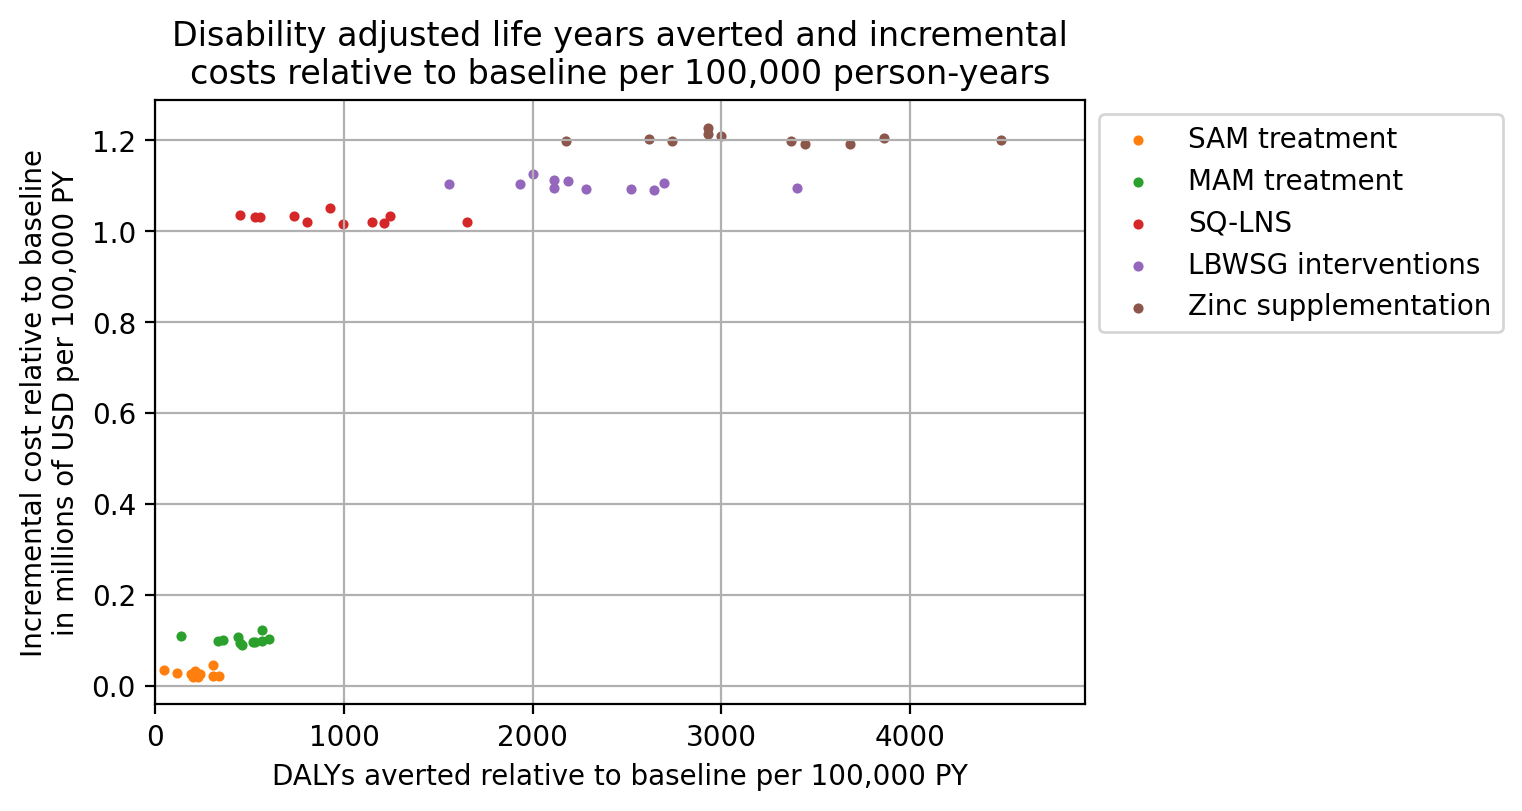

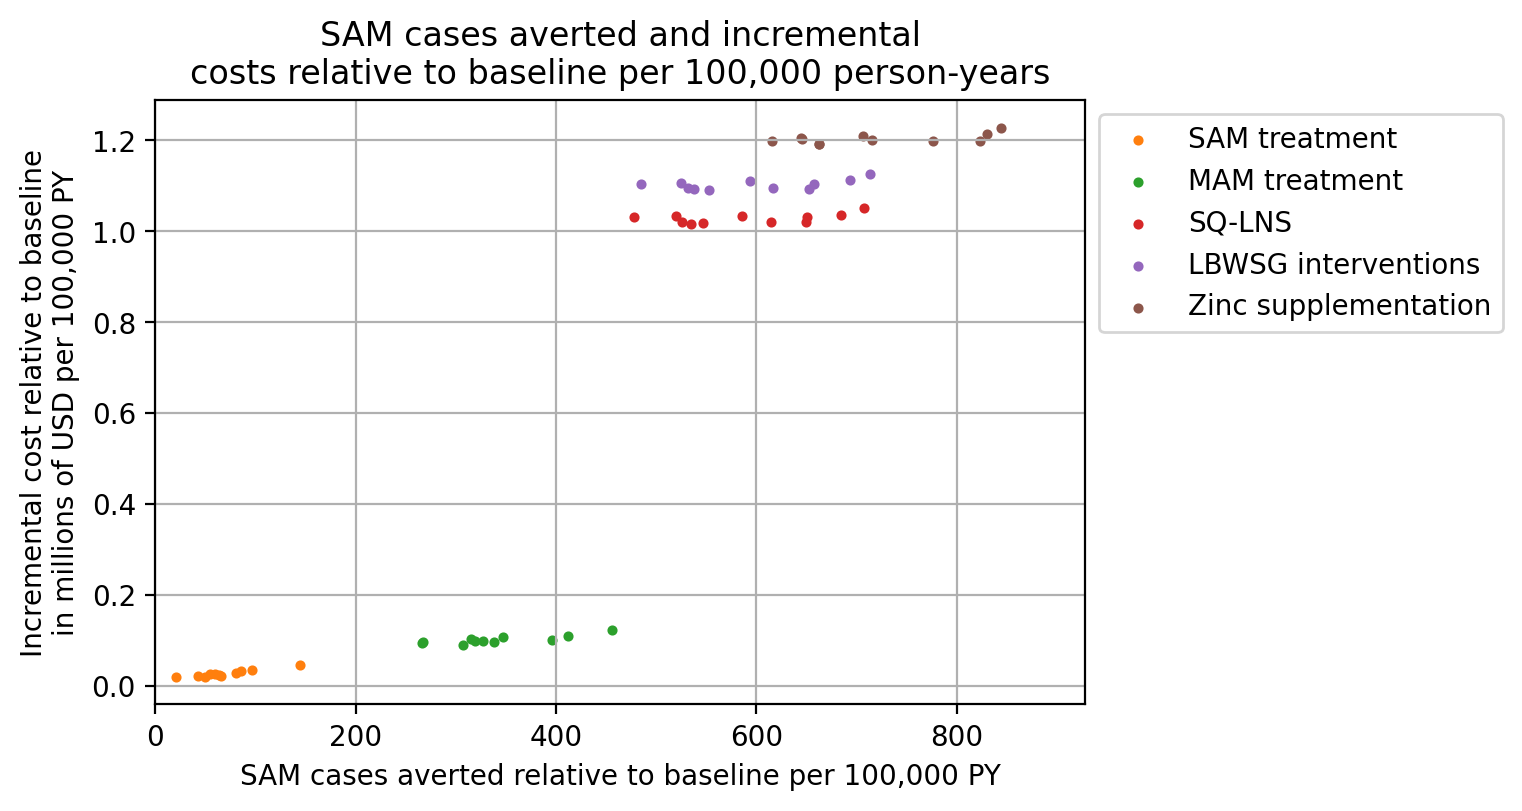

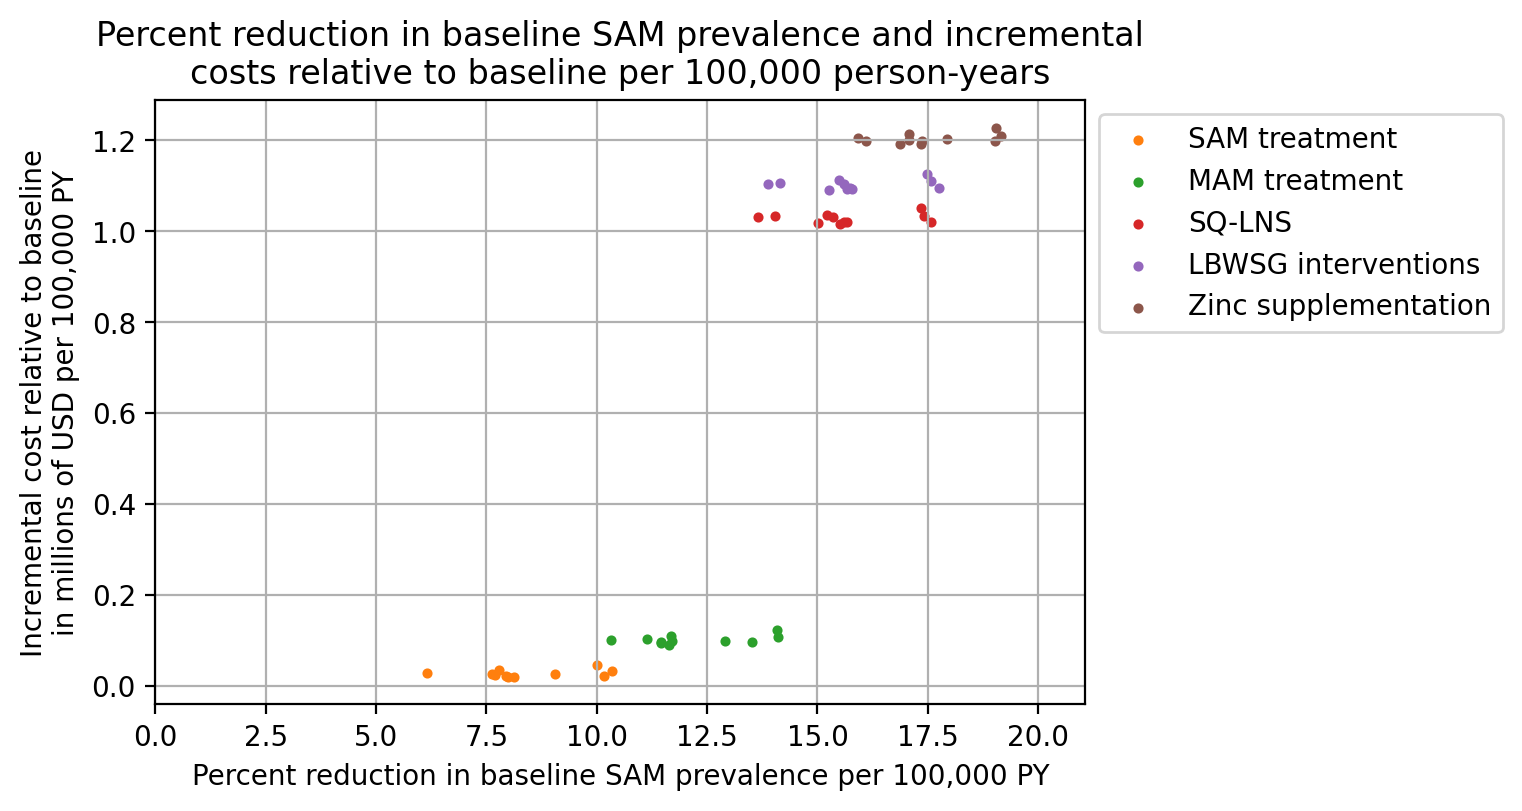

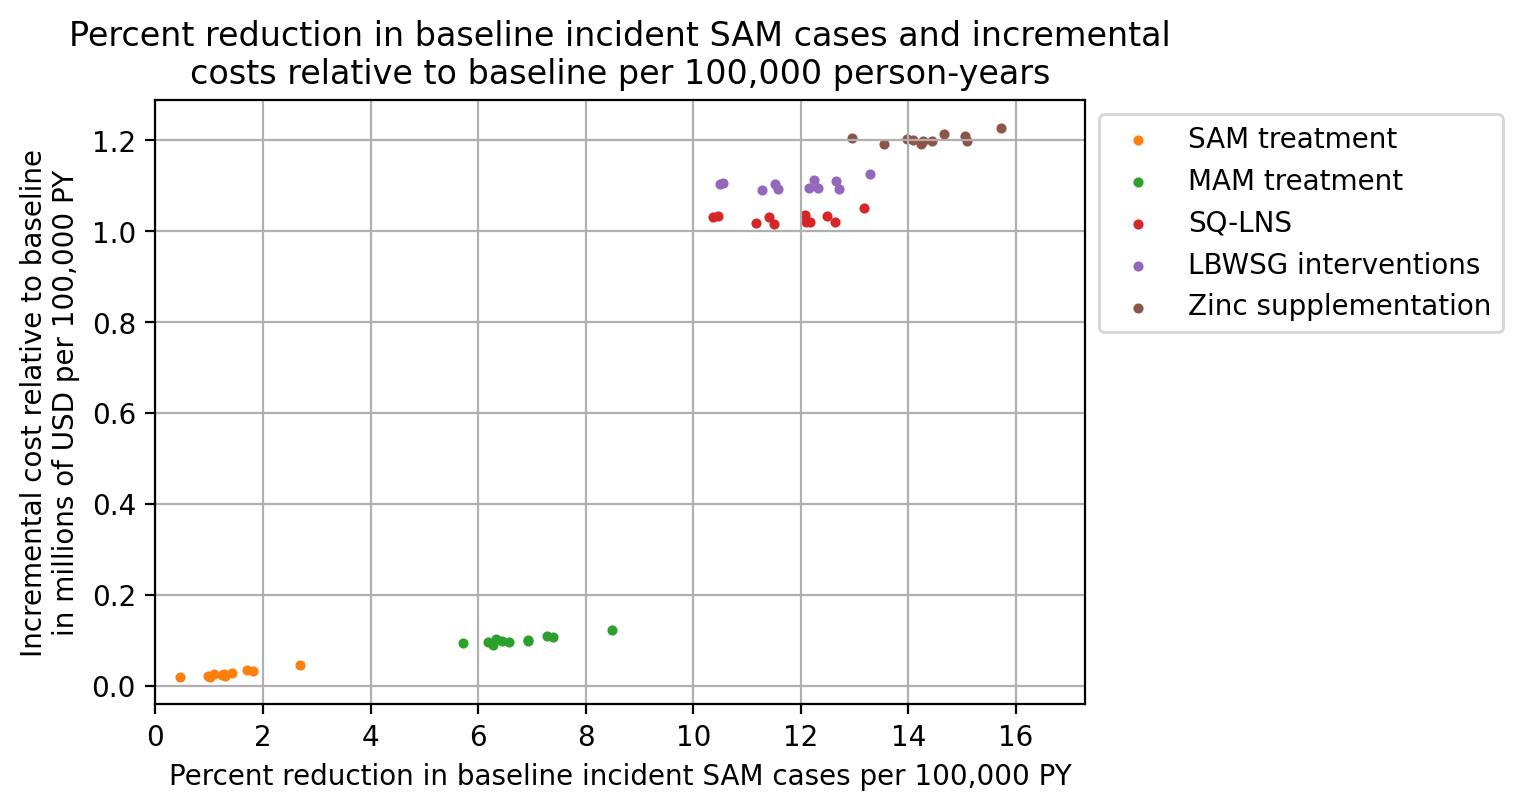

In [49]:
plot_measure_averted_and_incremental_costs(dalys_averted, 'DALYs averted relative to baseline', 'Disability adjusted life years averted')
plot_measure_averted_and_incremental_costs(sam_cases_averted, 'SAM cases averted relative to baseline', 'SAM cases averted')
plot_measure_averted_and_incremental_costs(sam_prev_pct_reduction, 'Percent reduction in baseline SAM prevalence', 
                                           'Percent reduction in baseline SAM prevalence')
plot_measure_averted_and_incremental_costs(sam_cases_pct_reduction, 'Percent reduction in baseline incident SAM cases', 
                                           'Percent reduction in baseline incident SAM cases')

In [50]:
def plot_icers(dataframe, label, title, ylim):
    plt.figure(dpi=120)
    p = dataframe.groupby('scenario').describe(percentiles=[0.025,0.975])[['value']].reset_index()
    p['order'] = np.where(p.scenario=='sam_treatment',0,
                         np.where(p.scenario=='mam_treatment',1,
                                 np.where(p.scenario=='sqlns',2,
                                         np.where(p.scenario=='lbwsg_interventions',3,
                                                 np.where(p.scenario=='zinc_supplementation',4,np.nan)))))
    p = p.sort_values(by='order')
    plt.bar(p.scenario, p['value','mean'], yerr=[p['value','mean']-p['value','2.5%'],
                                                 p['value','97.5%']-p['value','mean']])
    plt.ylim(0,ylim)
    plt.xticks(scenarios, [s + '\nscenario' for s in scenario_names],rotation=60)
    plt.grid()
    plt.ylabel(label)
    plt.title(title)
    #plt.semilogy()
    plt.axhline(936.30*3, linestyle='dotted', color='grey',label='Cost effective\nthreshold')
    plt.axhline(936.30, linestyle='dashed', color='grey',label='Highly cost\neffective threshold')
    
    #plt.yticks([50,100,500,1000,2500,5000],
    #          ['50','100','500','1,000','2,500','5,000'])
    plt.legend()#bbox_to_anchor=[1,1])

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(1, 1.15, 'Incremental cost effectiveness ratios (with 95% uncertainty intervals)')

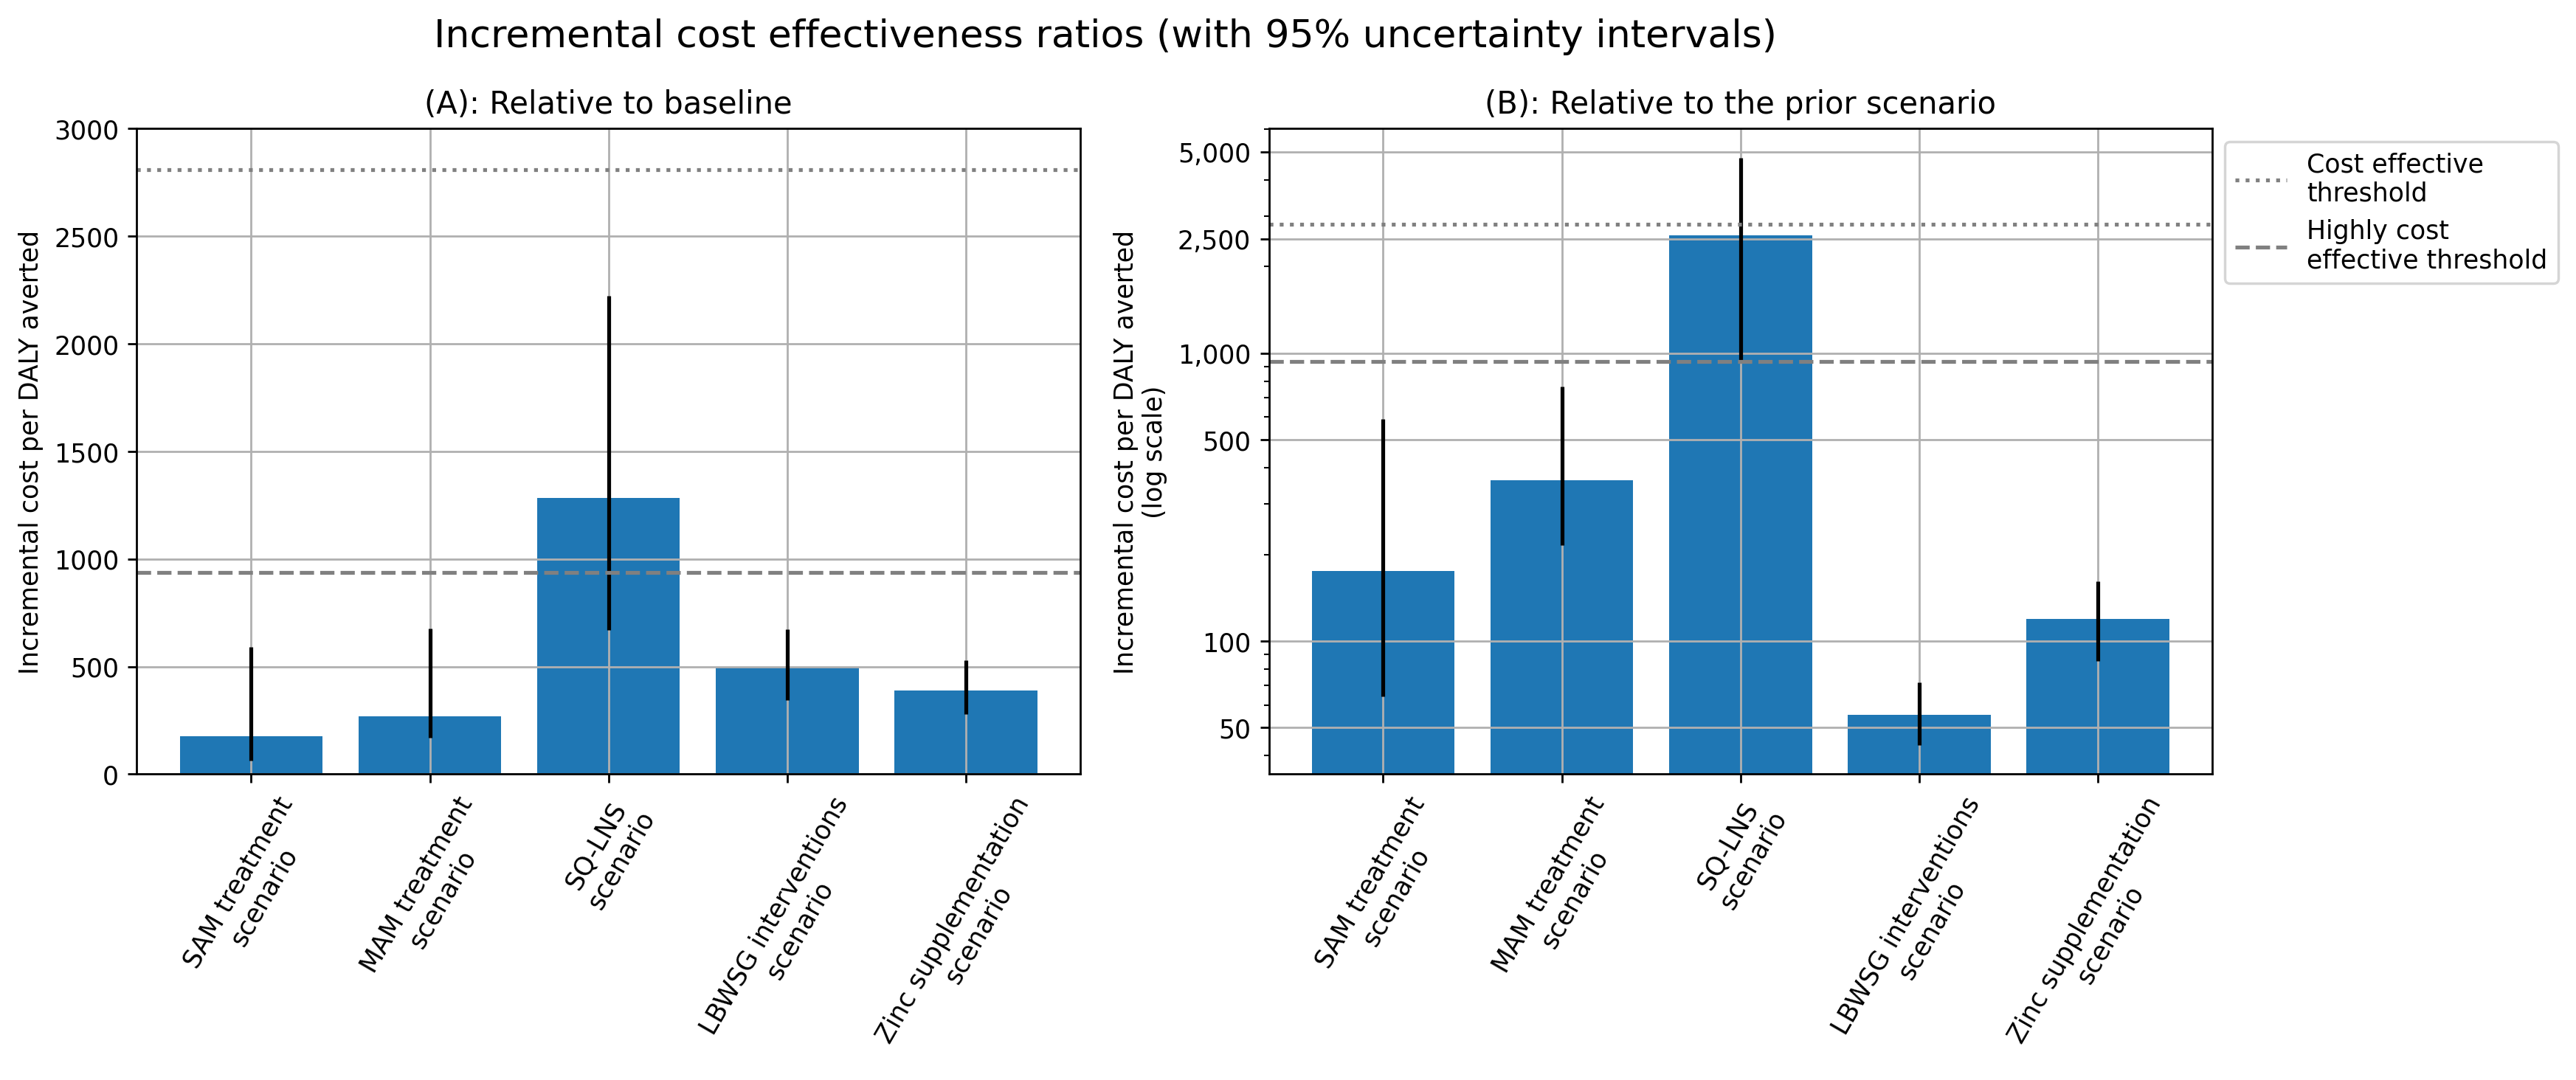

In [91]:
fig, axs = plt.subplots(1,2,dpi=250)

p = icers.groupby('scenario').describe(percentiles=[0.025,0.975])[['value']].reset_index()
p['order'] = np.where(p.scenario=='sam_treatment',0,
                     np.where(p.scenario=='mam_treatment',1,
                             np.where(p.scenario=='sqlns',2,
                                     np.where(p.scenario=='lbwsg_interventions',3,
                                             np.where(p.scenario=='zinc_supplementation',4,np.nan)))))
p = p.sort_values(by='order')

axs[0].bar(p.scenario, p['value','mean'], yerr=[p['value','mean']-p['value','2.5%'],
                                             p['value','97.5%']-p['value','mean']])
axs[0].set_ylim(0,3000)
axs[0].set_xticks(scenarios, [s + '\nscenario' for s in scenario_names],rotation=60)
axs[0].grid()
axs[0].set_ylabel('Incremental cost per DALY averted')
axs[0].set_title('(A): Relative to baseline')
axs[0].axhline(936.30*3, linestyle='dotted', color='grey',label='Cost effective\nthreshold')
axs[0].axhline(936.30, linestyle='dashed', color='grey',label='Highly cost\neffective threshold')
#axs[0].legend()


p = cascading_icers.groupby('scenario').describe(percentiles=[0.025,0.975])[['value']].reset_index()
p['order'] = np.where(p.scenario=='sam_treatment',0,
                     np.where(p.scenario=='mam_treatment',1,
                             np.where(p.scenario=='sqlns',2,
                                     np.where(p.scenario=='lbwsg_interventions',3,
                                             np.where(p.scenario=='zinc_supplementation',4,np.nan)))))
p = p.sort_values(by='order')

axs[1].bar(p.scenario, p['value','mean'], yerr=[p['value','mean']-p['value','2.5%'],
                                             p['value','97.5%']-p['value','mean']])
#axs[1].set_ylim(50,5000)
axs[1].semilogy()
axs[1].set_yticks([50,100,500,1000,2500,5000],
              ['50','100','500','1,000','2,500','5,000'])
axs[1].set_xticks(scenarios, [s + '\nscenario' for s in scenario_names],rotation=60)
axs[1].grid()
axs[1].set_ylabel('Incremental cost per DALY averted\n(log scale)')
axs[1].set_title('(B): Relative to the prior scenario')
axs[1].axhline(936.30*3, linestyle='dotted', color='grey',label='Cost effective\nthreshold')
axs[1].axhline(936.30, linestyle='dashed', color='grey',label='Highly cost\neffective threshold')

plt.subplots_adjust(right=2, top=1)
plt.legend(bbox_to_anchor=[1,1])
plt.suptitle('Incremental cost effectiveness ratios (with 95% uncertainty intervals)',
             y=1.15,x=1,size=15)

In [1]:
936.30*3

2808.8999999999996

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


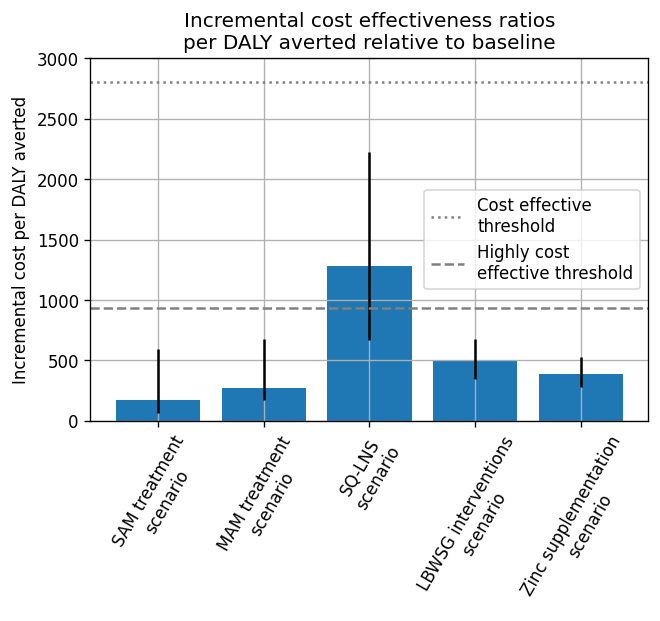

In [64]:
plot_icers(icers, 'Incremental cost per DALY averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to baseline',3000)


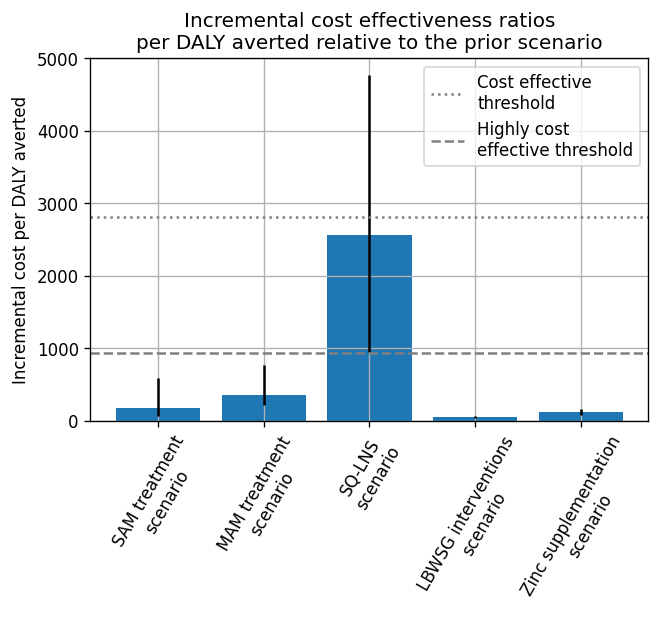

In [52]:
plot_icers(cascading_icers, 'Incremental cost per DALY averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to the prior scenario',5000)


/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


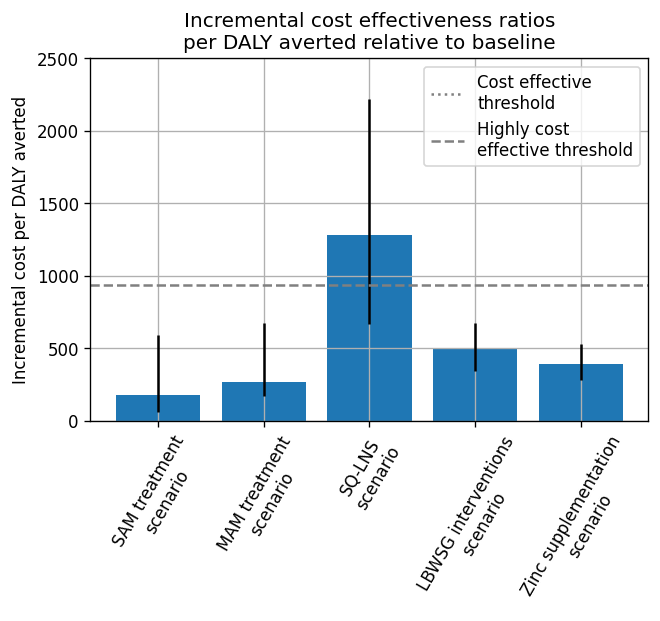

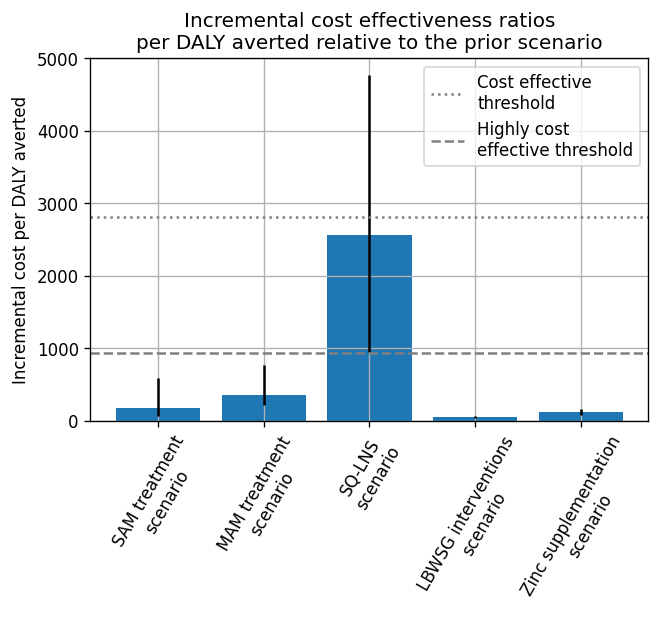

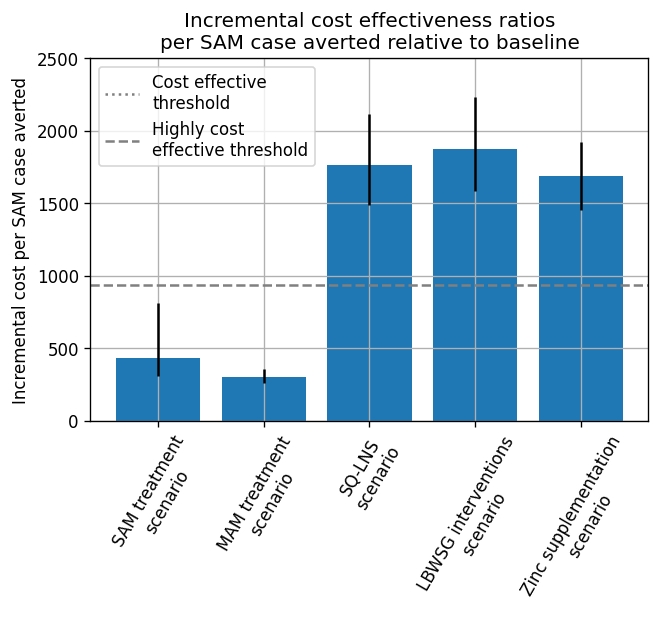

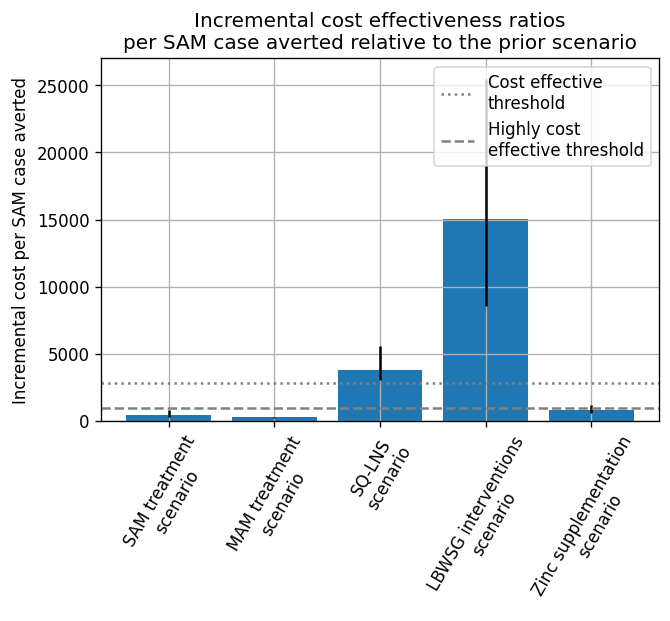

In [53]:
plot_icers(icers, 'Incremental cost per DALY averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to baseline',2500)
plot_icers(cascading_icers, 'Incremental cost per DALY averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to the prior scenario',5000)
plot_icers(icers_sam, 'Incremental cost per SAM case averted',
           'Incremental cost effectiveness ratios\nper SAM case averted relative to baseline', 2500)
plot_icers(cascading_icers_sam_cases, 'Incremental cost per SAM case averted',
           'Incremental cost effectiveness ratios\nper SAM case averted relative to the prior scenario',27_000)

# AARR

In [54]:
ages = ['6-11_months','12_to_23_months','2_to_4']
sam_prev = (wpt.loc[(wpt.age.isin(ages))
                  &(wpt.cause=='severe_acute_malnutrition')].groupby(['input_draw','scenario','year']).sum()
            /wpt.loc[(wpt.age.isin(ages))].groupby(['input_draw','scenario','year']).sum())[['value']].reset_index()
mam_prev = (wpt.loc[(wpt.age.isin(ages))
                  &(wpt.cause=='moderate_acute_malnutrition')].groupby(['input_draw','scenario','year']).sum()
            /wpt.loc[(wpt.age.isin(ages))].groupby(['input_draw','scenario','year']).sum())[['value']].reset_index()
gam_prev = (wpt.loc[(wpt.age.isin(ages))
                  &(wpt.cause.isin(['severe_acute_malnutrition',
                                    'moderate_acute_malnutrition']))].groupby(['input_draw','scenario','year']).sum()
            /wpt.loc[(wpt.age.isin(ages))].groupby(['input_draw','scenario','year']).sum())[['value']].reset_index()
sam_prev

,input_draw,scenario,year,value
0,29,baseline,2022,0.017395
1,29,baseline,2023,0.017789
2,29,baseline,2024,0.017464
3,29,baseline,2025,0.017502
4,29,baseline,2026,0.016812
...,...,...,...,...
325,946,zinc_supplementation,2022,0.019014
326,946,zinc_supplementation,2023,0.018392
327,946,zinc_supplementation,2024,0.015506
328,946,zinc_supplementation,2025,0.012844


In [55]:
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
sam_aarr = pd.DataFrame()
for scenario in sam_prev.scenario.unique():
    for input_draw in sam_prev.input_draw.unique():
        regression = smf.ols('np.log(value) ~ year', data=sam_prev.loc[(sam_prev.scenario==scenario)
                                                                      &(sam_prev.input_draw==input_draw)]).fit()
        temp = pd.DataFrame()
        temp['scenario'] = [scenario]
        temp['input_draw'] = [input_draw]
        temp['aarr'] = [1-np.exp(regression.params['year'])]
        sam_aarr = pd.concat([sam_aarr, temp])
        sam_aarr = pd.concat([sam_aarr, temp])

In [ ]:
mam_aarr = pd.DataFrame()
for scenario in sam_prev.scenario.unique():
    for input_draw in sam_prev.input_draw.unique():
        regression = smf.ols('np.log(value) ~ year', data=mam_prev.loc[(mam_prev.scenario==scenario)
                                                                      &(mam_prev.input_draw==input_draw)]).fit()
        temp = pd.DataFrame()
        temp['scenario'] = [scenario]
        temp['input_draw'] = [input_draw]
        temp['aarr'] = [1-np.exp(regression.params['year'])]
        mam_aarr = pd.concat([mam_aarr, temp])
        mam_aarr = pd.concat([mam_aarr, temp])

In [ ]:
gam_aarr = pd.DataFrame()
for scenario in sam_prev.scenario.unique():
    for input_draw in sam_prev.input_draw.unique():
        regression = smf.ols('np.log(value) ~ year', data=gam_prev.loc[(gam_prev.scenario==scenario)
                                                                      &(gam_prev.input_draw==input_draw)]).fit()
        temp = pd.DataFrame()
        temp['scenario'] = [scenario]
        temp['input_draw'] = [input_draw]
        temp['aarr'] = [1-np.exp(regression.params['year'])]
        gam_aarr = pd.concat([gam_aarr, temp])
        gam_aarr = pd.concat([gam_aarr, temp])

In [ ]:
plt.figure(dpi=120)
sam_aarr_p = sam_aarr.groupby('scenario').describe(percentiles=[0.025,0.975]).reset_index().drop(columns='input_draw')
sam_aarr_p['aarr'] = sam_aarr_p.aarr * 100
sam_aarr_p['order'] = np.where(sam_aarr_p.scenario=='sam_treatment',0,
                         np.where(sam_aarr_p.scenario=='mam_treatment',1,
                                 np.where(sam_aarr_p.scenario=='sqlns',2,
                                        np.where(sam_aarr_p.scenario=='lbwsg_interventions',3,
                                                 np.where(sam_aarr_p.scenario=='zinc_supplementation',4,10)))))
sam_aarr_p = sam_aarr_p.sort_values(by='order').loc[sam_aarr_p.scenario!='baseline']
plt.bar(sam_aarr_p.scenario, sam_aarr_p['aarr','mean'], yerr=[sam_aarr_p['aarr','mean']-sam_aarr_p['aarr','2.5%'],
                                                              sam_aarr_p['aarr','97.5%']-sam_aarr_p['aarr','mean']])
plt.xticks(sam_aarr_p.scenario,[s + '\nscenario' for s in scenario_names], rotation=60)
plt.title('Average annual rate of reduction for SAM\namong children six to 59 months of age')
plt.ylabel('Average annual rate of reduction')
plt.ylim([0,14])

In [ ]:
plt.figure(dpi=120)
mam_aarr_p = mam_aarr.groupby('scenario').describe(percentiles=[0.025,0.975]).reset_index().drop(columns='input_draw')
mam_aarr_p['aarr'] = mam_aarr_p.aarr * 100
mam_aarr_p['order'] = np.where(mam_aarr_p.scenario=='sam_treatment',0,
                         np.where(mam_aarr_p.scenario=='mam_treatment',1,
                                 np.where(mam_aarr_p.scenario=='sqlns',2,
                                        np.where(mam_aarr_p.scenario=='lbwsg_interventions',3,
                                                 np.where(mam_aarr_p.scenario=='zinc_supplementation',4,10)))))
mam_aarr_p = mam_aarr_p.sort_values(by='order').loc[mam_aarr_p.scenario!='baseline']
plt.bar(mam_aarr_p.scenario, mam_aarr_p['aarr','mean'], yerr=[mam_aarr_p['aarr','mean']-mam_aarr_p['aarr','2.5%'],
                                                              mam_aarr_p['aarr','97.5%']-mam_aarr_p['aarr','mean']])
plt.xticks(mam_aarr_p.scenario,[s + '\nscenario' for s in scenario_names], rotation=60)
plt.title('Average annual rate of reduction for MAM\namong children six to 59 months of age')
plt.ylabel('Average annual rate of reduction')
plt.ylim([0,14])

In [ ]:
plt.figure(dpi=120)
gam_aarr_p = gam_aarr.groupby('scenario').describe(percentiles=[0.025,0.975]).reset_index().drop(columns='input_draw')
gam_aarr_p['aarr'] = gam_aarr_p.aarr * 100
gam_aarr_p['order'] = np.where(gam_aarr_p.scenario=='sam_treatment',0,
                         np.where(gam_aarr_p.scenario=='mam_treatment',1,
                                 np.where(gam_aarr_p.scenario=='sqlns',2,
                                        np.where(gam_aarr_p.scenario=='lbwsg_interventions',3,
                                                 np.where(gam_aarr_p.scenario=='zinc_supplementation',4,10)))))
gam_aarr_p = gam_aarr_p.sort_values(by='order').loc[gam_aarr_p.scenario!='baseline']
plt.bar(gam_aarr_p.scenario, gam_aarr_p['aarr','mean'], yerr=[gam_aarr_p['aarr','mean']-gam_aarr_p['aarr','2.5%'],
                                                              gam_aarr_p['aarr','97.5%']-gam_aarr_p['aarr','mean']])
plt.xticks(gam_aarr_p.scenario,[s + '\nscenario' for s in scenario_names], rotation=60)
plt.title('Average annual rate of reduction for GAM\namong children six to 59 months of age')
plt.ylabel('Average annual rate of reduction')
plt.ylim([0,14])